In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

random_state = 123456

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=random_state)

In [12]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=random_state)).fit(
    X_train_sc, y_train)
#mask = selector.get_support()

## Resultate anzeigen
## tbd: kontrollieren, ob dieser Data Frame wirklich gebraucht wird, oder nur anzeigen
##   dann allerdings auch gleich sortiert
print(pd.DataFrame({
    'Feature': X_train.columns,
    'coeff' : selector.estimator_.coef_,
    'mask' : selector.get_support()}). \
      sort_values(by=['coeff'], ascending = False))

## Redzuierte Data Frames erzeugen (train und test)
X_train_red = X_train.loc[:, selector.get_support()]
X_test_red = X_test.loc[:, selector.get_support()]

                             Feature        coeff   mask
24                 hometeam_FC Basel  5455.480131   True
22           hometeam_BSC Young Boys  3092.727025   True
30            hometeam_FC St. Gallen  1768.693819   True
34                hometeam_FC Zürich   998.667631   True
29                  hometeam_FC Sion   982.134040   True
27                hometeam_FC Luzern   873.988334   True
41                 awayteam_FC Basel   742.922314   True
1                             season   695.398909   True
13                          temp_avg   625.839105   True
37          hometeam_Servette Genève   602.872709   True
19                   weekday_Sonntag   562.742769   True
18                   weekday_Samstag   366.264164   True
9                          form_home   331.149163   True
51                awayteam_FC Zürich   295.922247   True
54          awayteam_Servette Genève   276.123080   True
0                           matchday   185.036560   True
17                    weekday_M

In [4]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_red)
X_train_red_sc = scaler.transform(X_train_red)
X_test_red_sc = scaler.transform(X_test_red)

100 0.9112739494455595
150 0.9117832344530081
200 0.9119418430361315
250 0.9127669818375401
300 0.9131665399548642
350 0.9133256547752363
400 0.9133564451886936
450 0.9133284888301869
best_val   =  400
best_score =  0.9133564451886936


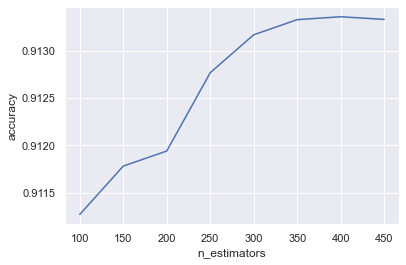

In [5]:
from sklearn.ensemble import RandomForestRegressor
scores = []
best_val = 0
best_score = 0
nes = np.arange(100, 500, 50)

for ne in nes:
    model = RandomForestRegressor(n_estimators = ne, random_state = random_state)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = ne
    print(ne, score)

fig = sns.lineplot(x=nes, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

1 0.7669653505634522
2 0.806196609660406
3 0.8265067838894529
4 0.8408270823836771
5 0.8489862199922745
6 0.8559358548339255
7 0.8641087603243449
8 0.8701547126686089
9 0.8720213252405438
10 0.8766827824857446
11 0.8799083776699458
12 0.8821041096449348
13 0.8819684796804782
14 0.8873070205653146
15 0.8866541016224181
16 0.8885409955465384
17 0.8914752530865581
18 0.8933069800578771
19 0.8951323507506677
20 0.8967081533882062
21 0.8958126241102466
22 0.897235278029163
23 0.9000420821584749
24 0.9006727732513563
25 0.9021166482258923
26 0.9012639929741334
27 0.9021752767802814
28 0.9035651533798872
29 0.9038364177805033
30 0.9050851892401296
31 0.9066740742865608
32 0.907337452562747
33 0.9070683108399714
34 0.9069390478977786
35 0.9079419074116629
36 0.9078766859940847
37 0.908384347923215
38 0.9087940464503647
39 0.9095933276182921
40 0.9096565536484958
41 0.910377297545762
42 0.9098836499662136
43 0.9103221902691557
44 0.911200922358528
45 0.911575898026569
46 0.9114274740329399
47 0

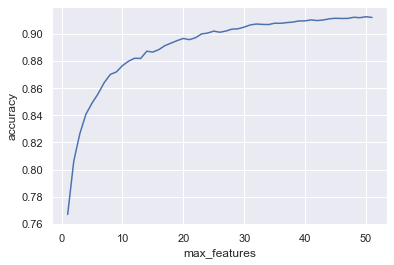

In [6]:
#Bester Wert bei 400
scores = []
best_val = 0
best_score = 0
mfs = range(1, 52)

for mf in mfs:
    model = RandomForestRegressor(n_estimators= 400, max_features = mf, random_state = random_state)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mf
    print(mf, score)


fig = sns.lineplot(x=mfs, y=scores)
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

0.0 0.9119418430361315
0.05 0.9120015215314837
0.1 0.9120555842430874
0.15000000000000002 0.9121413083410138
0.2 0.9123415029394097
0.25 0.9120649911820836
0.30000000000000004 0.9119772231828602
0.35000000000000003 0.9118766861131864
0.4 0.9117610355188092
0.45 0.9118318311173977
0.5 0.9118916959092694
0.55 0.9120818360315243
0.6000000000000001 0.9114132966175035
0.65 0.9113391325259455
0.7000000000000001 0.9114386102972019
0.75 0.9112868093478055
0.8 0.9115400701501607
0.8500000000000001 0.9115276336873299
0.9 0.9117532177562531
0.9500000000000001 0.9116189152568177
best_val   =  0.2
best_score =  0.9123415029394097


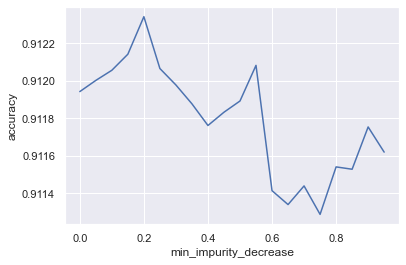

In [7]:
# Bester Wert: keiner

scores = []
best_val = 0
best_score = 0
mids = np.arange(0, 1, 0.05)
score = 0

for mid in mids:
    model = RandomForestRegressor(n_estimators= 400, min_impurity_decrease = mid, random_state = random_state)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = mid
    print(mid, score)

fig = sns.lineplot(x=mids, y=scores)
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy')
plt.show()
print('best_val   = ', best_val)
print('best_score = ', best_score)

100 0.9022335108323066
150 0.9024331072728586
200 0.9026750091286171
250 0.9019313300611993
300 0.9016624970482814
350 0.9011512790085046
400 0.9011365271715682
450 0.9013360018945688
best_val   =  200
best_score =  0.9026750091286171


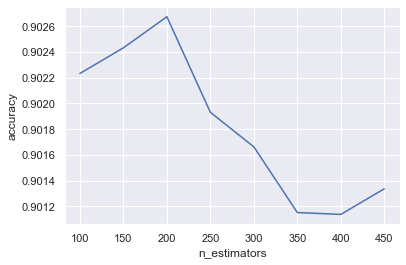

In [7]:
#Bester Wert varriert nach random state. wahrscheinlich 0 am geeignetsten



0.9134720383399895
[1.36234152e-02 5.75680302e-02 3.47800948e-02 3.01610920e-02
 1.05274100e-02 6.55225429e-03 4.64008624e-03 6.36763257e-03
 1.06456886e-02 8.86568161e-03 6.19685973e-03 3.36706071e-03
 7.14664734e-03 9.93459032e-03 4.69000822e-04 3.49409852e-04
 4.98343826e-04 6.56607979e-04 2.14528421e-03 1.05347893e-03
 1.26603024e-03 4.05113480e-04 1.70904339e-01 4.82350196e-04
 5.04116920e-01 2.25410773e-04 2.99155909e-04 1.91885533e-02
 3.64162836e-04 1.45806359e-02 2.91846544e-02 2.61625802e-03
 2.20872289e-04 1.03445389e-05 1.51599375e-02 1.77797190e-03
 5.37847431e-04 3.59792984e-03 9.58332484e-06 7.50278572e-04
 3.53925234e-04 1.17861172e-02 2.18169581e-04 5.35486371e-05
 3.78783238e-04 1.59931300e-03 3.35284404e-04 6.42834509e-04
 9.68280121e-04 2.51480708e-04 3.92369045e-05 7.09063992e-04
 6.77581774e-04 2.80625605e-04 3.31411967e-04 1.27324172e-04]


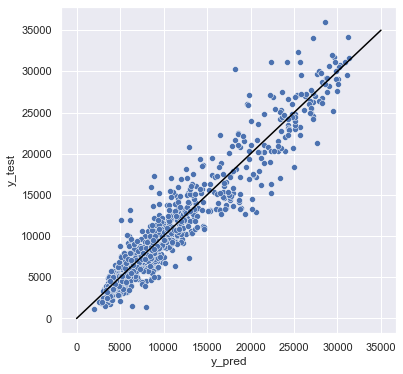

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 200)
model.fit(X_train_sc, y_train)
print(model.score(X_test_sc, y_test))
y_pred = model.predict(X_test_sc)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(xlabel='y_pred', ylabel='y_test')
ls = np.linspace(0, 35000, 100)
plt.plot(ls, ls, color='black')
plt.show()

print(model.feature_importances_)


In [14]:
best = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
best = best.sort_values(by=['importance'], ascending=False)
print(best)

                             feature  importance
24                 hometeam_FC Basel    0.504117
22           hometeam_BSC Young Boys    0.170904
1                             season    0.057568
2                      team_distance    0.034780
3                        points_home    0.030161
30            hometeam_FC St. Gallen    0.029185
27                hometeam_FC Luzern    0.019189
34                hometeam_FC Zürich    0.015160
29                  hometeam_FC Sion    0.014581
0                           matchday    0.013623
41                 awayteam_FC Basel    0.011786
8          last_season_position_away    0.010646
4                        points_away    0.010527
13                          temp_avg    0.009935
9                          form_home    0.008866
12                               sun    0.007147
5                      position_home    0.006552
7          last_season_position_home    0.006368
10                         form_away    0.006197
6                   